<a href="https://colab.research.google.com/github/Tharick15/Data-Science-/blob/main/Tecnicas_de_undersampling_e_oversampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelagem e Preparação de Dados para Aprendizado de Máquina**
## Técnicas de undersampling e oversampling 

# Importação dos dados 

#### Montando o drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Pacotes e Configurações

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 13.6 MB/s 
     |████████████████████████████████| 199 kB 50.4 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from matplotlib import pyplot
from collections import Counter 
from imblearn.under_sampling import CondensedNearestNeighbour
% matplotlib inline

### Carregando Dados

In [ ]:
df_credit = pd.read_csv('/content/drive/MyDrive/Pós ciência de dados e Big data/Modelagem e preparação de dados para aprendizado de máquina/Arquivos/creditcard_transformed.csv')

print('Df Crédito Shape: {}'.format(df_credit.shape))

Df Crédito Shape: (284807, 3)


In [ ]:
df_credit.head()

,X1,X2,Y
0,1.359780,0.071828,0
1,-1.191891,-0.265616,0
2,1.358334,1.340460,0
3,0.966301,0.185586,0
4,1.158246,-0.877576,0


In [ ]:
df_credit['Y'].value_counts()

0    284315
1       492
Name: Y, dtype: int64

# Undersampling

## Randon

In [ ]:
df_credit_maj = df_credit[(df_credit['Y'] == 0)]
df_credit_min = df_credit[(df_credit['Y'] == 1)]
df_sample_maj = df_credit_maj.sample(frac = 0.01, random_state = 40)
undersampled_df = pd.concat([df_sample_maj,df_credit_min], axis = 0)

In [ ]:
df_credit["Y"].value_counts()

0    284315
1       492
Name: Y, dtype: int64

In [ ]:
undersampled_df['Y'].value_counts()

0    2843
1     492
Name: Y, dtype: int64

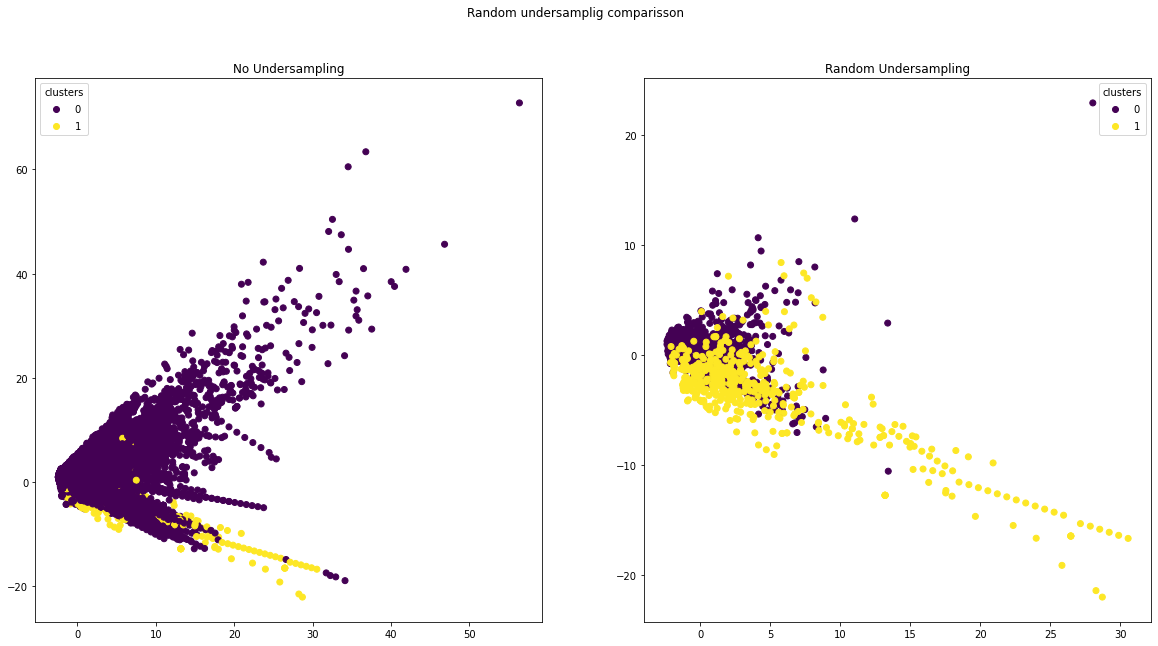

In [ ]:
figure, axis = plt.subplots(1, 2 , figsize= (20 , 10))
figure.suptitle('Random undersamplig comparisson')
sc = axis[0].scatter(data = df_credit, x = 'X1',y = 'X2' , c='Y' , cmap='viridis');
axis[0].legend(*sc.legend_elements(), title='clusters');
axis[0].set_title("No Undersampling");
sc_2 = axis[1].scatter(data = undersampled_df, x = 'X1',y = 'X2' , c='Y' , cmap='viridis');
axis[1].legend(*sc_2.legend_elements(), title='clusters');
axis[1].set_title("Random Undersampling");

## TOMEK LINKS


In [ ]:
from imblearn.under_sampling import TomekLinks

In [ ]:
tomek = TomekLinks()

In [ ]:
X_tomek_res, y_tomek_res = tomek.fit_resample(X, y)

In [ ]:
y.value_counts()

0    284315
1       492
Name: Y, dtype: int64

In [ ]:
y_tomek_res.value_counts()

0    284098
1       492
Name: Y, dtype: int64

In [ ]:
undersampled_tomek_df = pd.concat([X_tomek_res,y_tomek_res], axis = 1)

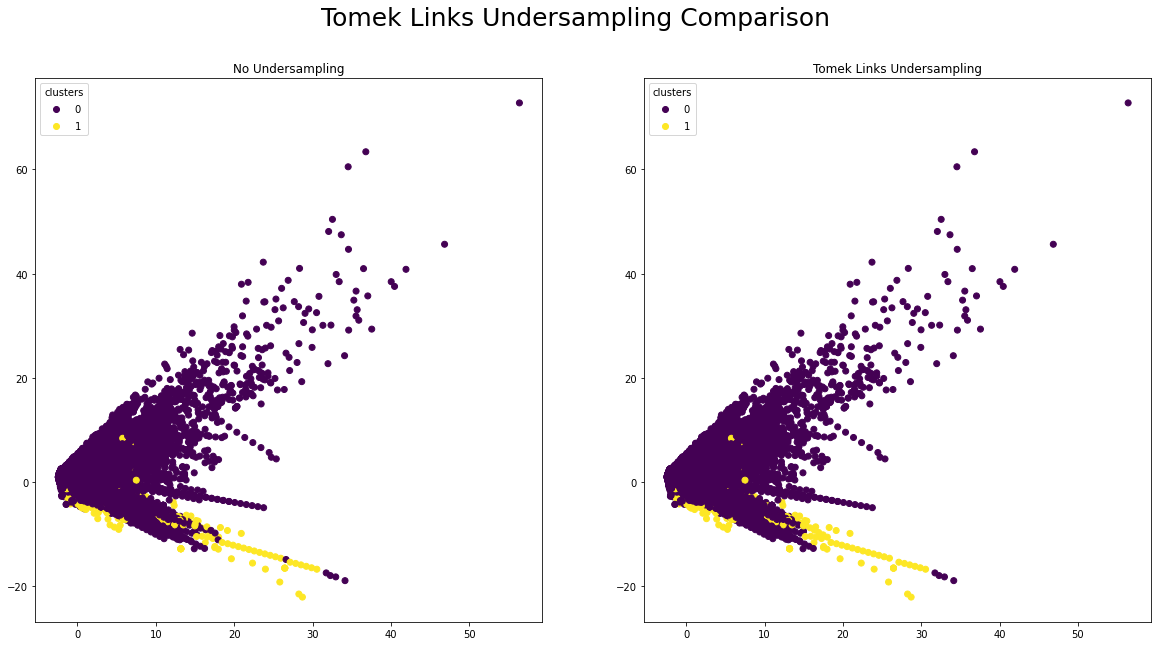

In [ ]:
figure, axis = plt.subplots(1, 2 , figsize= (20 , 10))
figure.suptitle('Tomek Links Undersampling Comparison', fontsize=25)
sc = axis[0].scatter(data = df_credit, x = 'X1',y = 'X2' , c='Y' , cmap='viridis');
axis[0].legend(*sc.legend_elements(), title='clusters');
axis[0].set_title("No Undersampling");
sc_2 = axis[1].scatter(data = undersampled_tomek_df, x = 'X1',y = 'X2' , c='Y' , cmap='viridis');
axis[1].legend(*sc_2.legend_elements(), title='clusters');
axis[1].set_title("Tomek Links Undersampling");

## ENN


In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours

In [ ]:
enn = EditedNearestNeighbours(n_neighbors=3)

In [ ]:
X_enn_res, y_enn_res = enn.fit_resample(X, y)

In [ ]:
y.value_counts()

0    284315
1       492
Name: Y, dtype: int64

In [ ]:
y_enn_res.value_counts()

0    283322
1       492
Name: Y, dtype: int64

In [ ]:
undersampled_enn_df = pd.concat([X_enn_res,y_enn_res], axis = 1)

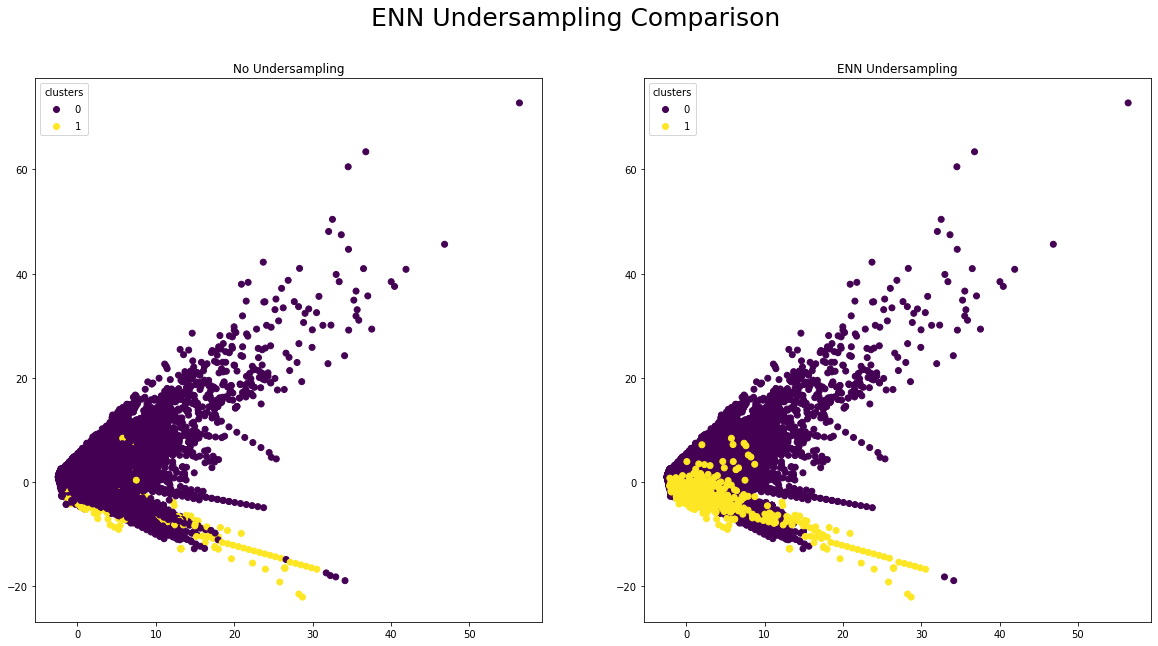

In [ ]:
figure, axis = plt.subplots(1, 2 , figsize= (20 , 10))
figure.suptitle('ENN Undersampling Comparison', fontsize=25)
sc = axis[0].scatter(data = df_credit, x = 'X1',y = 'X2' , c='Y' , cmap='viridis');
axis[0].legend(*sc.legend_elements(), title='clusters');
axis[0].set_title("No Undersampling");
sc_2 = axis[1].scatter(data = undersampled_enn_df, x = 'X1',y = 'X2' , c='Y' , cmap='viridis');
axis[1].legend(*sc_2.legend_elements(), title='clusters');
axis[1].set_title("ENN Undersampling");

## OSS


In [ ]:
from imblearn.under_sampling import OneSidedSelection

In [ ]:
oss = OneSidedSelection(n_neighbors=1, n_seeds_S=200)

In [ ]:
X_oss_res, y_oss_res = oss.fit_resample(X, y)

In [ ]:
y.value_counts()

0    284315
1       492
Name: Y, dtype: int64

In [ ]:
y_oss_res.value_counts()

0    90903
1      492
Name: Y, dtype: int64

In [ ]:
undersampled_oss_df = pd.concat([X_oss_res,y_oss_res], axis = 1)

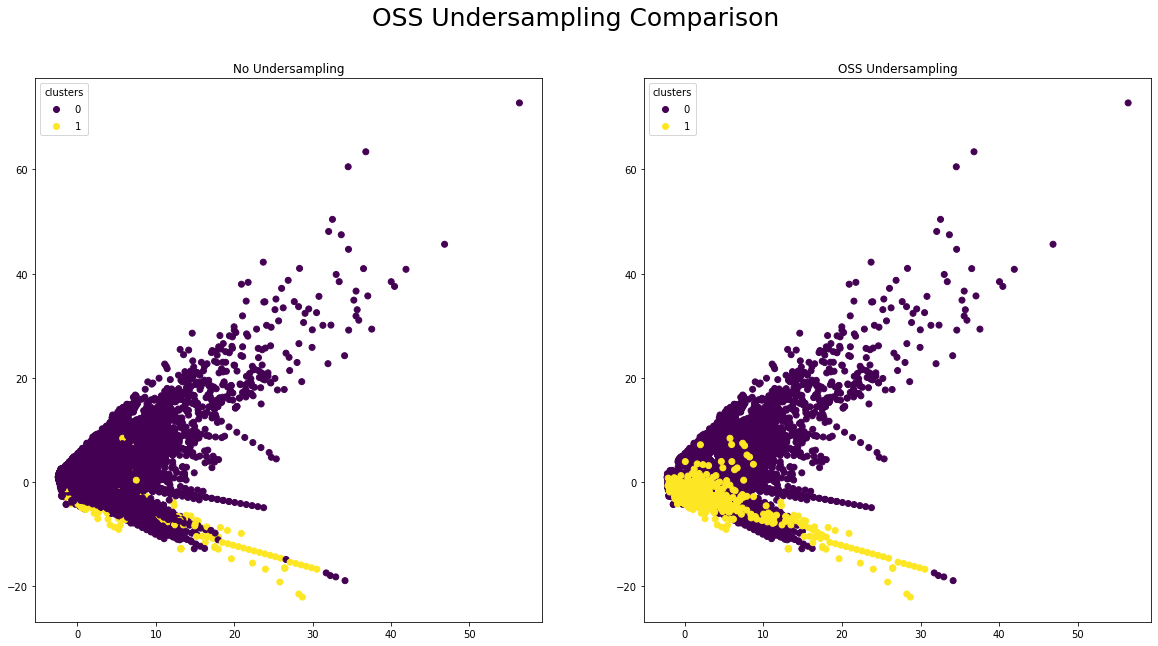

In [ ]:
figure, axis = plt.subplots(1, 2 , figsize= (20 , 10))
figure.suptitle('OSS Undersampling Comparison', fontsize=25)
sc = axis[0].scatter(data = df_credit, x = 'X1',y = 'X2' , c='Y' , cmap='viridis');
axis[0].legend(*sc.legend_elements(), title='clusters');
axis[0].set_title("No Undersampling");
sc_2 = axis[1].scatter(data = undersampled_oss_df, x = 'X1',y = 'X2' , c='Y' , cmap='viridis');
axis[1].legend(*sc_2.legend_elements(), title='clusters');
axis[1].set_title("OSS Undersampling");

## NCR


In [ ]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

In [ ]:
ncr = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)

In [ ]:
X_ncr_res, y_ncr_res = ncr.fit_resample(X, y)

In [ ]:
y.value_counts()

0    284315
1       492
Name: Y, dtype: int64

In [ ]:
y_ncr_res.value_counts()

0    283251
1       492
Name: Y, dtype: int64

In [ ]:
undersampled_ncr_df = pd.concat([X_ncr_res,y_ncr_res], axis = 1)

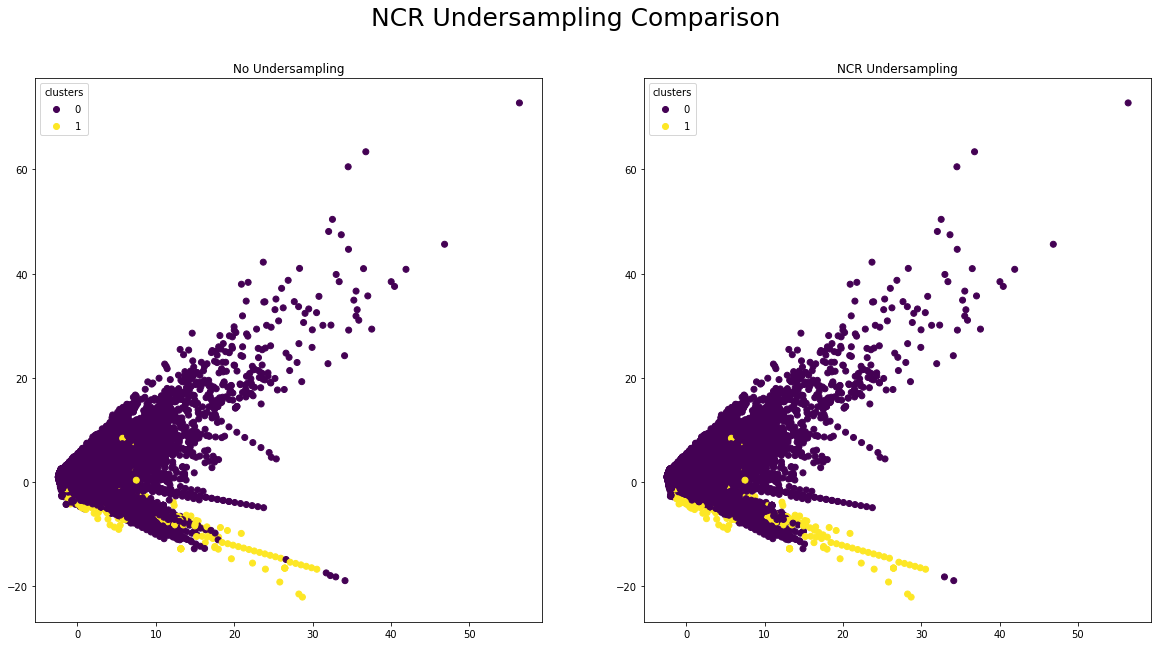

In [ ]:
figure, axis = plt.subplots(1, 2 , figsize= (20 , 10))
figure.suptitle('NCR Undersampling Comparison', fontsize=25)
sc = axis[0].scatter(data = df_credit, x = 'X1',y = 'X2' , c='Y' , cmap='viridis');
axis[0].legend(*sc.legend_elements(), title='clusters');
axis[0].set_title("No Undersampling");
sc_2 = axis[1].scatter(data = undersampled_ncr_df, x = 'X1',y = 'X2' , c='Y' , cmap='viridis');
axis[1].legend(*sc_2.legend_elements(), title='clusters');
axis[1].set_title("NCR Undersampling");

## Resumo Undersampling 

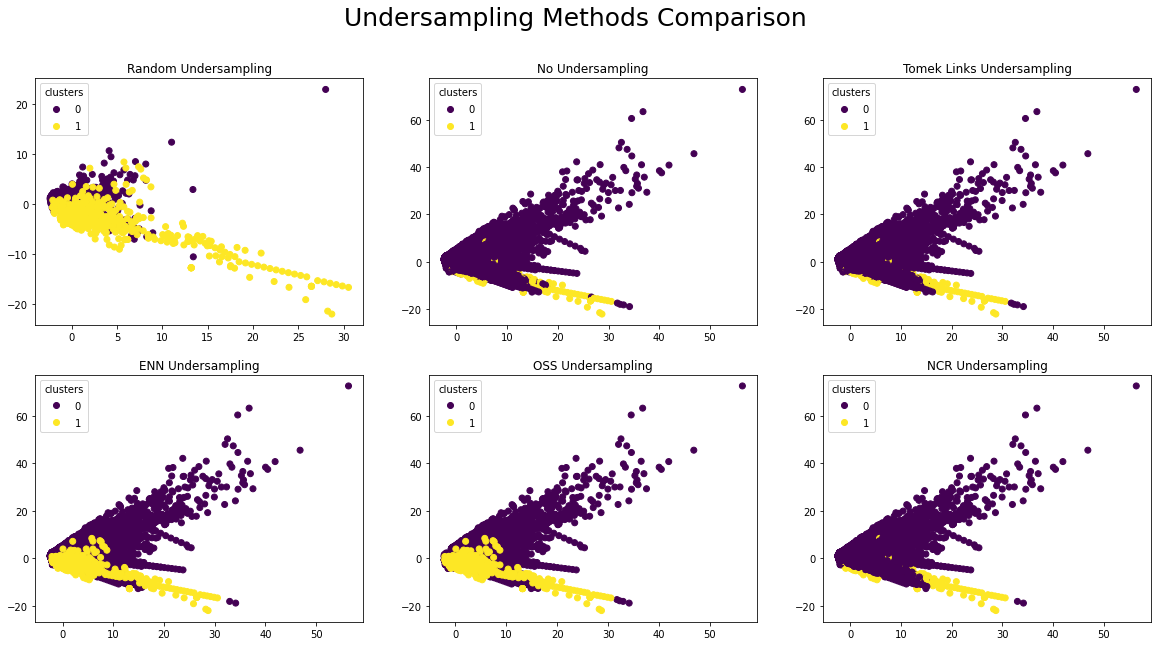

In [ ]:
figure, axis = plt.subplots(2, 3 , figsize= (20 , 10))
figure.suptitle('Undersampling Methods Comparison', fontsize=25)
random = axis[0,0].scatter(data = undersampled_df, x = 'X1',y = 'X2' , c='Y' , cmap='viridis');
axis[0,0].legend(*random.legend_elements(), title='clusters');
axis[0,0].set_title("Random Undersampling");
cnn = axis[0,1].scatter(data = df_credit, x = 'X1',y = 'X2' , c='Y' , cmap='viridis');
axis[0,1].legend(*cnn.legend_elements(), title='clusters');
axis[0,1].set_title("No Undersampling");
tomek = axis[0,2].scatter(data = undersampled_tomek_df, x = 'X1',y = 'X2' , c='Y' , cmap='viridis');
axis[0,2].legend(*tomek.legend_elements(), title='clusters');
axis[0,2].set_title("Tomek Links Undersampling");
enn = axis[1,0].scatter(data = undersampled_enn_df, x = 'X1',y = 'X2' , c='Y' , cmap='viridis');
axis[1,0].legend(*enn.legend_elements(), title='clusters');
axis[1,0].set_title("ENN Undersampling");
oss = axis[1,1].scatter(data = undersampled_oss_df, x = 'X1',y = 'X2' , c='Y' , cmap='viridis');
axis[1,1].legend(*oss.legend_elements(), title='clusters');
axis[1,1].set_title("OSS Undersampling");
ncr = axis[1,2].scatter(data = undersampled_ncr_df, x = 'X1',y = 'X2' , c='Y' , cmap='viridis');
axis[1,2].legend(*ncr.legend_elements(), title='clusters');
axis[1,2].set_title("NCR Undersampling");

# Oversampling

## Random


In [ ]:
from imblearn.over_sampling import RandomOverSampler 

In [ ]:
random_over = RandomOverSampler(sampling_strategy=0.3 ,random_state=42)

In [ ]:
X_random_over_res, y_random_over_res = random_over.fit_resample(X, y)

In [ ]:
y.value_counts()

0    284315
1       492
Name: Y, dtype: int64

In [ ]:
y_random_over_res.value_counts()

0    284315
1     85294
Name: Y, dtype: int64

In [ ]:
oversampled_random_df = pd.concat([X_random_over_res,y_random_over_res], axis = 1)

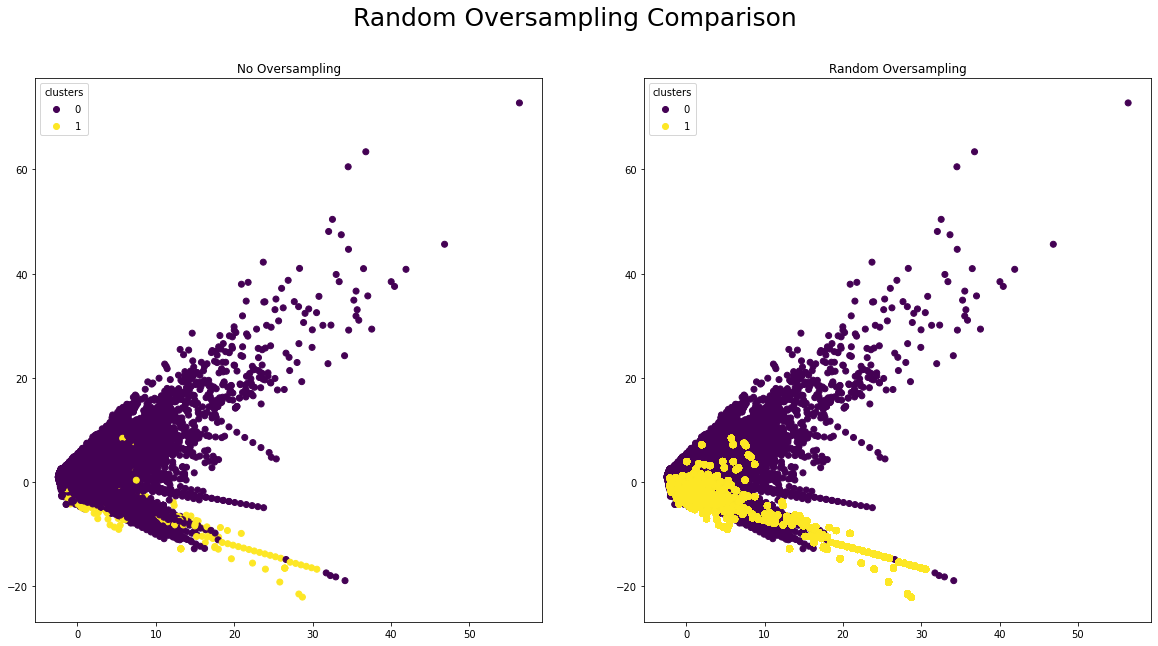

In [ ]:
figure, axis = plt.subplots(1, 2 , figsize= (20 , 10))
figure.suptitle('Random Oversampling Comparison', fontsize=25)
sc = axis[0].scatter(data = df_credit, x = 'X1',y = 'X2' , c='Y' , cmap='viridis');
axis[0].legend(*sc.legend_elements(), title='clusters');
axis[0].set_title("No Oversampling");
sc_2 = axis[1].scatter(data = oversampled_random_df, x = 'X1',y = 'X2' , c='Y' , cmap='viridis');
axis[1].legend(*sc_2.legend_elements(), title='clusters');
axis[1].set_title("Random Oversampling");

## SMOTE


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy=0.4, random_state = 42)

In [ ]:
X_smote_res, y_smote_res = smote.fit_resample(X, y)

In [ ]:
y.value_counts()

0    284315
1       492
Name: Y, dtype: int64

In [ ]:
y_smote_res.value_counts()

0    284315
1    113726
Name: Y, dtype: int64

In [ ]:
oversampled_smote_df = pd.concat([X_smote_res,y_smote_res], axis = 1)

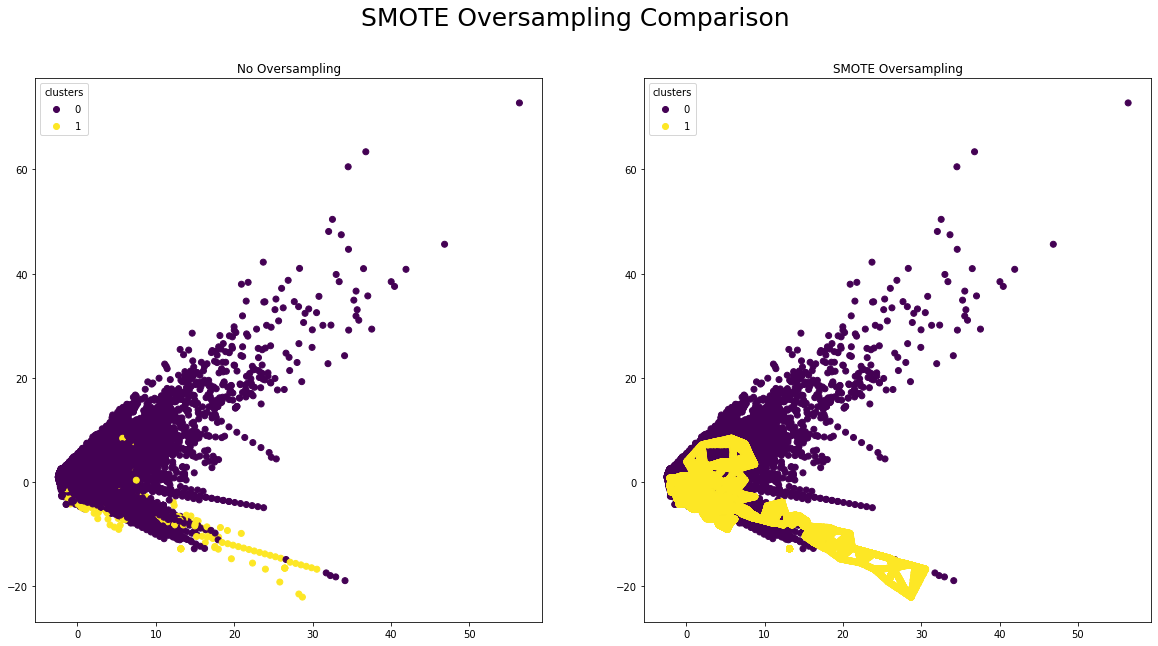

In [ ]:
figure, axis = plt.subplots(1, 2 , figsize= (20 , 10))
figure.suptitle('SMOTE Oversampling Comparison', fontsize=25)
sc = axis[0].scatter(data = df_credit, x = 'X1',y = 'X2' , c='Y' , cmap='viridis');
axis[0].legend(*sc.legend_elements(), title='clusters');
axis[0].set_title("No Oversampling");
sc_2 = axis[1].scatter(data = oversampled_smote_df, x = 'X1',y = 'X2' , c='Y' , cmap='viridis');
axis[1].legend(*sc_2.legend_elements(), title='clusters');
axis[1].set_title("SMOTE Oversampling");

## BorderlineSMOTE


In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

In [ ]:
bordersmote = BorderlineSMOTE(sampling_strategy=0.4, random_state = 42)

In [ ]:
X_bordersmote_res, y_bordersmote_res = bordersmote.fit_resample(X, y)

In [ ]:
y.value_counts()

0    284315
1       492
Name: Y, dtype: int64

In [ ]:
y_bordersmote_res.value_counts()

0    284315
1    113726
Name: Y, dtype: int64

In [ ]:
oversampled_bordersmote_df = pd.concat([X_bordersmote_res,y_bordersmote_res], axis = 1)

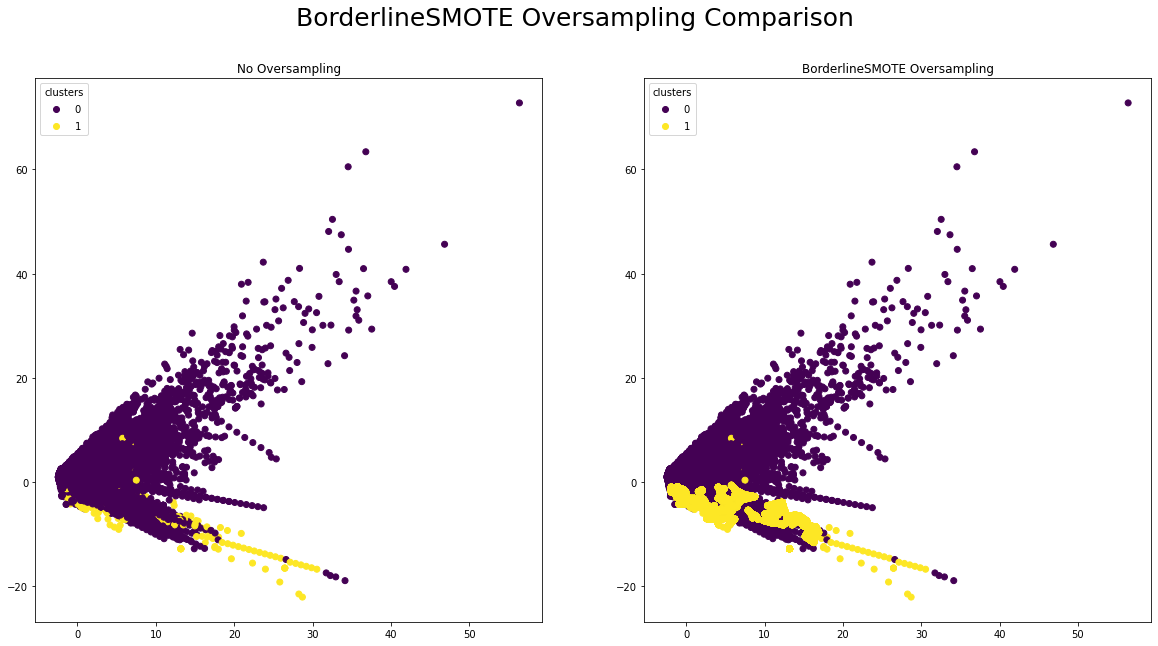

In [ ]:
figure, axis = plt.subplots(1, 2 , figsize= (20 , 10))
figure.suptitle('BorderlineSMOTE Oversampling Comparison', fontsize=25)
sc = axis[0].scatter(data = df_credit, x = 'X1',y = 'X2' , c='Y' , cmap='viridis');
axis[0].legend(*sc.legend_elements(), title='clusters');
axis[0].set_title("No Oversampling");
sc_2 = axis[1].scatter(data = oversampled_bordersmote_df, x = 'X1',y = 'X2' , c='Y' , cmap='viridis');
axis[1].legend(*sc_2.legend_elements(), title='clusters');
axis[1].set_title("BorderlineSMOTE Oversampling");

## ADASYN


In [ ]:
from imblearn.over_sampling import ADASYN

In [ ]:
ads = ADASYN(sampling_strategy=0.4, random_state = 42)

In [ ]:
X_ads_res, y_ads_res = ads.fit_resample(X, y)

In [ ]:
y.value_counts()

0    284315
1       492
Name: Y, dtype: int64

In [ ]:
y_ads_res.value_counts()

0    284315
1    113611
Name: Y, dtype: int64

In [ ]:
oversampled_ads_df = pd.concat([X_ads_res,y_ads_res], axis = 1)

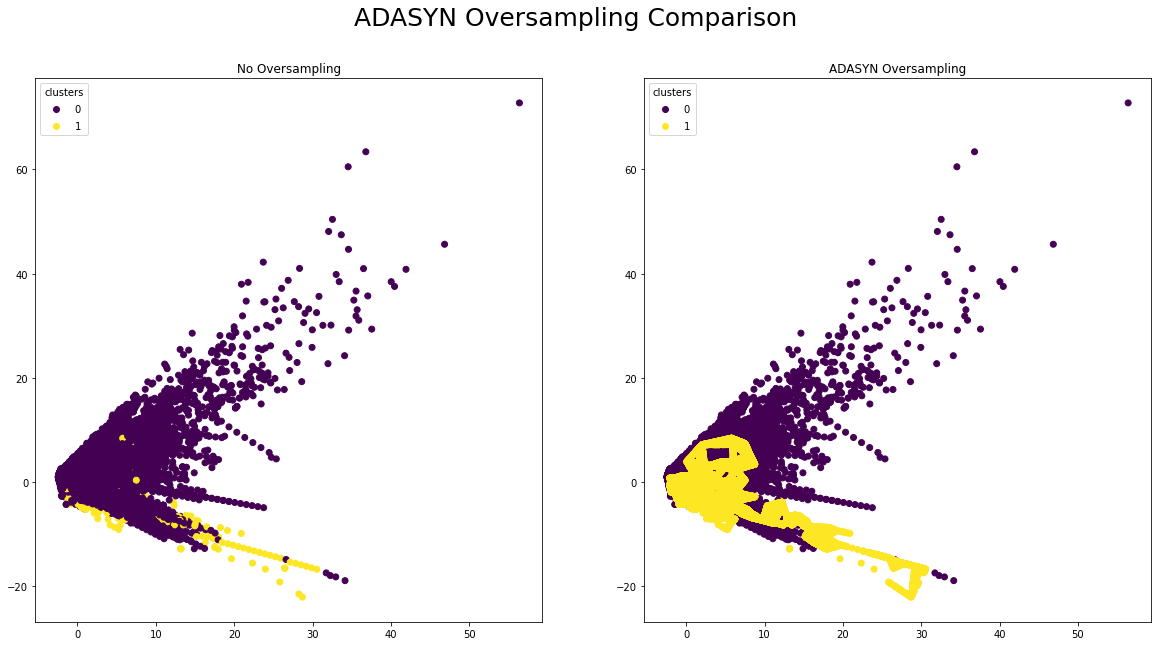

In [ ]:
figure, axis = plt.subplots(1, 2 , figsize= (20 , 10))
figure.suptitle('ADASYN Oversampling Comparison', fontsize=25)
sc = axis[0].scatter(data = df_credit, x = 'X1',y = 'X2' , c='Y' , cmap='viridis');
axis[0].legend(*sc.legend_elements(), title='clusters');
axis[0].set_title("No Oversampling");
sc_2 = axis[1].scatter(data = oversampled_ads_df, x = 'X1',y = 'X2' , c='Y' , cmap='viridis');
axis[1].legend(*sc_2.legend_elements(), title='clusters');
axis[1].set_title("ADASYN Oversampling");

## Resumo Oversampling

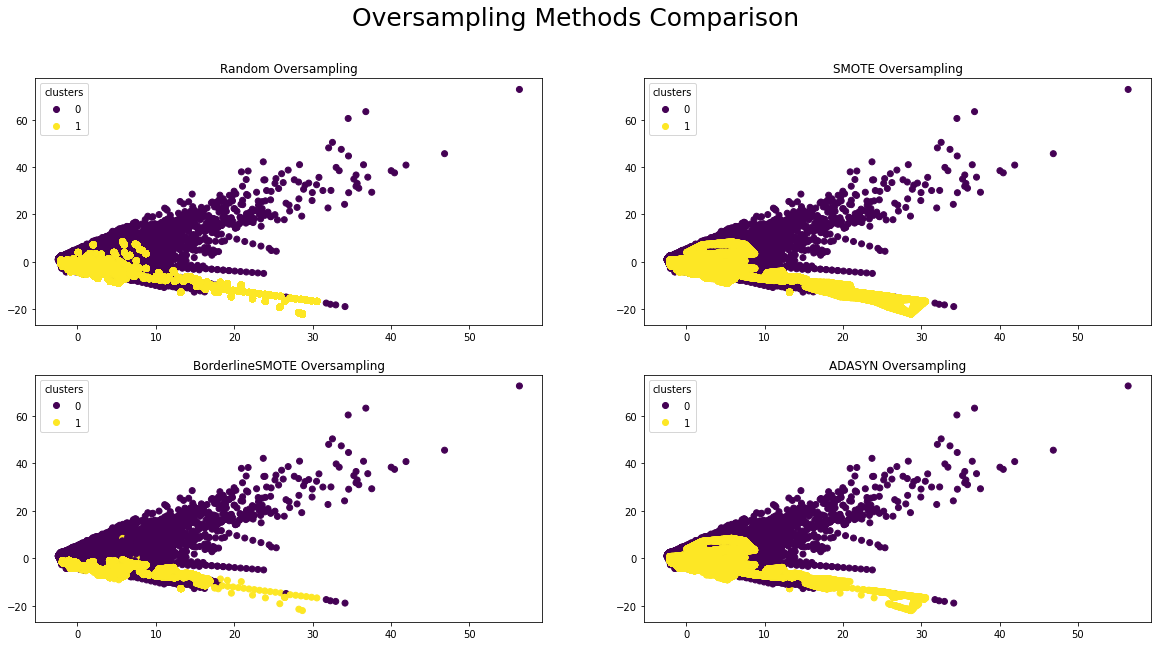

In [ ]:
figure, axis = plt.subplots(2, 2 , figsize= (20 , 10))
figure.suptitle('Oversampling Methods Comparison', fontsize=25)
random = axis[0,0].scatter(data = oversampled_random_df, x = 'X1',y = 'X2' , c='Y' , cmap='viridis');
axis[0,0].legend(*random.legend_elements(), title='clusters');
axis[0,0].set_title("Random Oversampling");
smote = axis[0,1].scatter(data = oversampled_smote_df, x = 'X1',y = 'X2' , c='Y' , cmap='viridis');
axis[0,1].legend(*smote.legend_elements(), title='clusters');
axis[0,1].set_title("SMOTE Oversampling");
border = axis[1,0].scatter(data = oversampled_bordersmote_df, x = 'X1',y = 'X2' , c='Y' , cmap='viridis');
axis[1,0].legend(*border.legend_elements(), title='clusters');
axis[1,0].set_title("BorderlineSMOTE Oversampling");
adasyn = axis[1,1].scatter(data = oversampled_ads_df, x = 'X1',y = 'X2' , c='Y' , cmap='viridis');
axis[1,1].legend(*adasyn.legend_elements(), title='clusters');
axis[1,1].set_title("ADASYN Oversampling");